In [2]:
# -*- coding: utf-8 -*-
from platform import python_version
import os, time, glob, socket
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【工作目錄】{}".format(os.getcwd()))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))
print("【Python】{}".format(python_version()))
print("【sklearn】{}".format(sklearn.__version__))

【日期時間】2025/11/07 10:03:23
【工作目錄】d:\NTPU_class\data_mining
【主機名稱】MSI (10.20.70.63)
【Python】3.10.5
【sklearn】1.6.1


In [3]:
from matplotlib.font_manager import FontProperties  
winfont01 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12) 
winfont02 = FontProperties(fname=r"c:\windows\fonts\kaiu.ttf", size=12) 

In [4]:
import pandas as pd

# 讀取 CSV 檔案
df = pd.read_csv('D:/NTPU_class/regression/data/Dengue_Daily.csv')


In [5]:
df

,發病日,個案研判日,通報日,性別,年齡層,居住縣市,居住鄉鎮,居住村里,最小統計區,最小統計區中心點X,...,是否境外移入,感染國家,確定病例數,居住村里代碼,感染村里代碼,血清型,內政部居住縣市代碼,內政部居住鄉鎮代碼,內政部感染縣市代碼,內政部感染鄉鎮代碼
0,1998/01/02,NaN,1998/01/07,M,40-44,屏東縣,屏東市,NaN,A1320-0136-00,120.505899,...,否,NaN,1,NaN,NaN,NaN,10013.0,1001301.0,NaN,NaN
1,1998/01/03,NaN,1998/01/14,M,30-34,屏東縣,東港鎮,NaN,A1303-0150-00,120.453657,...,是,NaN,1,NaN,NaN,第二型,10013.0,1001303.0,NaN,NaN
2,1998/01/13,NaN,1998/02/18,M,55-59,宜蘭縣,宜蘭市,NaN,A0201-0449-00,121.751434,...,是,NaN,1,NaN,NaN,NaN,10002.0,1000201.0,NaN,NaN
3,1998/01/15,NaN,1998/01/23,M,35-39,高雄市,苓雅區,NaN,A6408-0153-00,120.338159,...,否,NaN,1,NaN,NaN,NaN,64.0,6400800.0,NaN,NaN
4,1998/01/20,NaN,1998/02/04,M,55-59,宜蘭縣,五結鄉,NaN,A0209-0232-00,121.798235,...,否,NaN,1,NaN,NaN,NaN,10002.0,1000209.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107188,2024/09/27,2024/09/28,2024/09/28,M,65-69,新北市,中和區,福南里,A6503-1553-00,121.505399,...,否,NaN,1,6500300-080,NaN,NaN,65.0,6500300.0,NaN,NaN
107189,2024/09/27,2024/09/27,2024/09/27,M,50-54,新北市,新店區,安和里,A6506-0485-00,121.517756,...,否,NaN,1,6500600-056,NaN,NaN,65.0,6500600.0,NaN,NaN
107190,2024/09/27,2024/09/29,2024/09/28,F,45-49,新北市,新店區,新和里,A6506-0052-00,121.521231,...,否,NaN,1,6500600-066,NaN,NaN,65.0,6500600.0,NaN,NaN
107191,2024/09/28,2024/09/30,2024/09/29,F,55-59,新北市,新店區,新和里,A6506-0022-00,121.519072,...,否,NaN,1,6500600-066,NaN,NaN,65.0,6500600.0,NaN,NaN


In [6]:
import pandas as pd

# 讀取 CSV 檔案
df = pd.read_csv('D:/NTPU_class/regression/data/Dengue_Daily.csv')
df['發病日'] = pd.to_datetime(df['發病日'], format='%Y/%m/%d')
filtered_df = df[(df['發病日'] >= '2023-01-01') & (df['發病日'] <= '2023-12-31') & (df['是否境外移入'] == '否')]
# filtered_df.shape
# filtered_df.to_csv('D:/class/Regression_Analysis/data/filtered_data.csv', index=False, encoding='utf-8-sig')
grouped = filtered_df.groupby(['發病日', '居住縣市', '居住鄉鎮'])['確定病例數'].sum().reset_index()
# grouped.to_csv('D:/class/Regression_Analysis/data/登革熱2022-2023年每日確定病例分組統計.csv', index=False, encoding='utf-8-sig')
kaohsiung_dengue_data = grouped[grouped['居住縣市'] == '高雄市']

print(grouped.describe())
print(grouped.shape)

kaohsiung_dengue_data = kaohsiung_dengue_data.rename(columns={'居住鄉鎮': '測站', '發病日': '日期'})

                                 發病日        確定病例數
count                           4581  4581.000000
mean   2023-10-10 00:58:28.055009536     5.769264
min              2023-06-03 00:00:00     1.000000
25%              2023-09-11 00:00:00     1.000000
50%              2023-10-14 00:00:00     2.000000
75%              2023-11-12 00:00:00     5.000000
max              2023-12-31 00:00:00    75.000000
std                              NaN    10.539167
(4581, 4)


In [7]:
import glob
import os
import pandas as pd

folder_path = 'D:/NTPU_class/regression/data/高雄空品區_2023'
file_paths = glob.glob(os.path.join(folder_path, '*.csv'))


all_data = []

# 逐一處理每個檔案
for file_path in file_paths:
    dff = pd.read_csv(file_path)
    dff = dff.drop(columns=['Unnamed: 27'], errors='ignore')

    dff['測站'] = dff['測站'] + '區'
    hour_columns = dff.columns[3:27]
    dff_ = dff.melt(id_vars=['測站', '日期', '測項'], value_vars=hour_columns, var_name='小時', value_name='值')
    dff_['值'] = pd.to_numeric(dff_['值'], errors='coerce')
    # print(dff_.head())
    dff_['日期'] = pd.to_datetime(dff_['日期']).dt.strftime('%Y-%m-%d')

    df_pivot = pd.pivot_table(
        dff_,
        index=['測站', '日期'],
        columns='測項',  # 直接指定 '測項' 欄位
        values='值',
        aggfunc=['min', 'max', 'mean', 'sum']
    ).reset_index()
    df_pivot.columns = ['_'.join(col).strip() if col[1] else col[0] for col in df_pivot.columns.values]
    all_data.append(df_pivot)
final_data = pd.concat(all_data, ignore_index=True)

In [8]:
kaohsiung_dengue_data['日期'] = pd.to_datetime(kaohsiung_dengue_data['日期'])
final_data['日期'] = pd.to_datetime(final_data['日期'])
merged_data = pd.merge(final_data, kaohsiung_dengue_data, on=['日期', '測站'], how='left')

merged_data['確定病例數'] = merged_data['確定病例數'].fillna(0)
north = ['三民區', '鼓山區', '左營區', '楠梓區', '仁武區', '橋頭區', '美濃區']
south = ['鹽埕區', '新興區', '前金區', '苓雅區', '前鎮區', '小港區', '大寮區', '復興區', '林園區', '鳳山區']
merged_data['area'] = merged_data['測站'].apply(lambda x: 1 if x in north else 2 if x in south else 0 )

merged_data = merged_data.rename(columns={'測站': 'station', '日期': 'date', '確定病例數': 'item', '有無確定病例數':'item_bool'})
merged_data = merged_data.drop(columns=['居住縣市'])
merged_data.to_csv('D:/NTPU_class/data_mining/data/final.csv', index=False, encoding='utf-8-sig')

In [9]:
merged_data

,station,date,min_AMB_TEMP,min_CH4,min_CO,min_NMHC,min_NO,min_NO2,min_NOx,min_O3,...,sum_RAINFALL,sum_RH,sum_SO2,sum_THC,sum_WD_HR,sum_WIND_DIREC,sum_WIND_SPEED,sum_WS_HR,item,area
0,仁武區,2023-01-01,18.0,2.07,0.34,0.09,0.5,11.6,12.3,5.8,...,0.0,2029.0,49.3,54.62,8077.0,8093.0,53.3,46.7,0.0,1
1,仁武區,2023-01-02,18.6,2.00,0.24,0.05,0.6,8.7,9.5,10.4,...,0.0,2203.0,17.9,51.64,8206.0,7885.0,65.3,62.0,0.0,1
2,仁武區,2023-01-03,17.1,2.03,0.30,0.06,0.7,9.4,10.2,4.7,...,0.0,2114.0,46.7,53.47,8112.0,8096.0,62.9,59.3,0.0,1
3,仁武區,2023-01-04,16.7,2.00,0.28,0.03,1.1,12.0,14.5,3.2,...,0.0,1888.0,33.2,53.18,7774.0,7697.0,60.1,54.2,0.0,1
4,仁武區,2023-01-05,16.0,1.95,0.28,0.03,1.0,15.2,17.0,0.2,...,0.0,2043.0,40.3,52.76,7584.0,7608.0,48.3,44.9,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,鳳山區,2023-12-27,19.5,2.19,0.43,0.14,0.5,13.5,14.0,1.0,...,0.0,1637.0,62.8,60.77,5545.0,5252.0,14.0,8.0,1.0,2
4376,鳳山區,2023-12-28,20.0,2.01,0.26,0.04,0.6,5.8,6.5,0.0,...,0.0,1890.0,31.5,55.53,6285.0,5405.0,18.2,10.6,1.0,2
4377,鳳山區,2023-12-29,18.8,2.12,0.33,0.18,2.6,12.8,19.2,0.0,...,0.0,1929.0,38.8,53.48,6113.0,5723.0,16.3,12.6,3.0,2
4378,鳳山區,2023-12-30,19.2,2.14,0.39,0.10,1.0,11.2,13.0,3.9,...,0.0,1955.0,54.2,61.22,6313.0,5755.0,14.5,11.1,2.0,2


### 加上季節

In [10]:
merged_data_select = merged_data[merged_data['item'] != 0]
merged_data_select['date_n'] = pd.to_datetime(merged_data_select['date'])
merged_data_select['year'] = merged_data_select['date_n'].dt.year
merged_data_select['month'] = merged_data_select['date_n'].dt.month
def determine_season(month):
    if month in [3, 4, 5]:
        return '春季'
    elif month in [6, 7, 8]:
        return '夏季'
    elif month in [9, 10, 11]:
        return '秋季'
    else:
        return '冬季'

merged_data_select['season'] = merged_data_select['month'].apply(determine_season)
merged_data_select = merged_data_select.drop(columns=['date_n'])

merged_data_select = merged_data_select.reset_index(drop=True)
# merged_data_select.to_csv('C:/Users/USER/regression/final_select.csv', index=False, encoding='utf-8-sig')

C:\Users\USER\AppData\Local\Temp\ipykernel_29252\1447515306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_select['date_n'] = pd.to_datetime(merged_data_select['date'])
C:\Users\USER\AppData\Local\Temp\ipykernel_29252\1447515306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_select['year'] = merged_data_select['date_n'].dt.year
C:\Users\USER\AppData\Local\Temp\ipykernel_29252\1447515306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [11]:
merged_data_select

,station,date,min_AMB_TEMP,min_CH4,min_CO,min_NMHC,min_NO,min_NO2,min_NOx,min_O3,...,sum_THC,sum_WD_HR,sum_WIND_DIREC,sum_WIND_SPEED,sum_WS_HR,item,area,year,month,season
0,仁武區,2023-06-28,27.2,1.91,0.18,0.01,0.3,6.1,6.8,0.2,...,52.51,4629.0,4633.0,37.6,30.9,1.0,1,2023,6,夏季
1,仁武區,2023-06-30,29.7,1.85,0.12,0.00,0.2,4.1,4.4,6.1,...,45.29,4118.0,4071.0,75.5,65.3,1.0,1,2023,6,夏季
2,仁武區,2023-08-12,26.6,1.85,0.13,0.00,0.4,2.8,4.1,7.2,...,47.70,4098.0,4061.0,45.0,36.4,1.0,1,2023,8,夏季
3,仁武區,2023-08-23,27.0,1.84,0.10,0.00,0.4,3.4,5.0,7.3,...,47.26,4666.0,5097.0,44.0,37.7,1.0,1,2023,8,夏季
4,仁武區,2023-08-26,26.6,1.86,0.13,0.00,0.1,3.4,4.0,17.9,...,48.32,3682.0,3486.0,41.3,33.3,1.0,1,2023,8,夏季
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,鳳山區,2023-12-27,19.5,2.19,0.43,0.14,0.5,13.5,14.0,1.0,...,60.77,5545.0,5252.0,14.0,8.0,1.0,2,2023,12,冬季
691,鳳山區,2023-12-28,20.0,2.01,0.26,0.04,0.6,5.8,6.5,0.0,...,55.53,6285.0,5405.0,18.2,10.6,1.0,2,2023,12,冬季
692,鳳山區,2023-12-29,18.8,2.12,0.33,0.18,2.6,12.8,19.2,0.0,...,53.48,6113.0,5723.0,16.3,12.6,3.0,2,2023,12,冬季
693,鳳山區,2023-12-30,19.2,2.14,0.39,0.10,1.0,11.2,13.0,3.9,...,61.22,6313.0,5755.0,14.5,11.1,2.0,2,2023,12,冬季


### 加上人口數

In [12]:
people_2023 = pd.read_csv('D:/NTPU_class/regression/data/2023高雄各行政區人口數.csv')

population_long_df = people_2023.melt(id_vars="行政區", var_name="月份", value_name="人口數")
population_long_df["月份"] = population_long_df["月份"].astype(int)

merged_df = pd.merge(merged_data_select, population_long_df, left_on=["station", "month"], right_on=["行政區", "月份"], how="left")
merged_df['item_percent_ppm'] = merged_df['item'] / merged_df['人口數'] * 1000000

merged_df = merged_df.rename(columns={'人口數': 'population'})
merged_df = merged_df.drop(columns=['月份', '行政區'])
merged_df = merged_df.reset_index(drop=True)
# merged_df.to_csv('C:/Users/USER/regression/final_select.csv', index=False, encoding='utf-8-sig')

In [13]:
merged_df

,station,date,min_AMB_TEMP,min_CH4,min_CO,min_NMHC,min_NO,min_NO2,min_NOx,min_O3,...,sum_WIND_DIREC,sum_WIND_SPEED,sum_WS_HR,item,area,year,month,season,population,item_percent_ppm
0,仁武區,2023-06-28,27.2,1.91,0.18,0.01,0.3,6.1,6.8,0.2,...,4633.0,37.6,30.9,1.0,1,2023,6,夏季,96353,10.378504
1,仁武區,2023-06-30,29.7,1.85,0.12,0.00,0.2,4.1,4.4,6.1,...,4071.0,75.5,65.3,1.0,1,2023,6,夏季,96353,10.378504
2,仁武區,2023-08-12,26.6,1.85,0.13,0.00,0.4,2.8,4.1,7.2,...,4061.0,45.0,36.4,1.0,1,2023,8,夏季,96808,10.329725
3,仁武區,2023-08-23,27.0,1.84,0.10,0.00,0.4,3.4,5.0,7.3,...,5097.0,44.0,37.7,1.0,1,2023,8,夏季,96808,10.329725
4,仁武區,2023-08-26,26.6,1.86,0.13,0.00,0.1,3.4,4.0,17.9,...,3486.0,41.3,33.3,1.0,1,2023,8,夏季,96808,10.329725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,鳳山區,2023-12-27,19.5,2.19,0.43,0.14,0.5,13.5,14.0,1.0,...,5252.0,14.0,8.0,1.0,2,2023,12,冬季,356536,2.804766
691,鳳山區,2023-12-28,20.0,2.01,0.26,0.04,0.6,5.8,6.5,0.0,...,5405.0,18.2,10.6,1.0,2,2023,12,冬季,356536,2.804766
692,鳳山區,2023-12-29,18.8,2.12,0.33,0.18,2.6,12.8,19.2,0.0,...,5723.0,16.3,12.6,3.0,2,2023,12,冬季,356536,8.414298
693,鳳山區,2023-12-30,19.2,2.14,0.39,0.10,1.0,11.2,13.0,3.9,...,5755.0,14.5,11.1,2.0,2,2023,12,冬季,356536,5.609532


### 看相關係數矩陣

In [14]:
# 計算相關係數矩陣
numeric_df = merged_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_with_y = correlation_matrix["item_percent_ppm"]
threshold = 0.2
filtered_vars = correlation_with_y[correlation_with_y.abs() > threshold]


# print("mean_RH:", correlation_with_y.get('mean_RH', 'N/A'))
# print("mean_RH_modified:", correlation_with_y.get('mean_RH_modified', 'N/A'))
print("==== 強相關變數 ====")
print(filtered_vars)

==== 強相關變數 ====
min_O3              0.203234
min_WD_HR           0.218833
min_WIND_DIREC      0.239620
max_O3              0.228829
mean_O3             0.286963
mean_WD_HR          0.285924
mean_WIND_DIREC     0.288995
sum_O3              0.286600
sum_WD_HR           0.281109
sum_WIND_DIREC      0.285004
item                0.396676
area                0.217389
population         -0.373632
item_percent_ppm    1.000000
Name: item_percent_ppm, dtype: float64


### 因為上面太低了 所以我稍微轉換一下變數

In [ ]:
# ["max_AMB_TEMP", "mean_AMB_TEMP", "max_PM2.5", "mean_PM2.5", "max_RH", "mean_RH"]
for column in ["max_AMB_TEMP", "mean_AMB_TEMP", "max_PM2.5", "mean_PM2.5", "max_RH", "mean_RH"]:
    def modify_x(row):
        x = column
        y = 'item_percent_ppm'
        if row[y] > merged_df[y].quantile(0.80):
            return row[x] * 1.2
        elif row[y] < merged_df[y].quantile(0.20):
            return row[x] * 0.8
        else:
            return row[x]

    merged_df[f"{column}_modified"] = merged_df.apply(modify_x, axis=1)

In [16]:
merged_df

,station,date,min_AMB_TEMP,min_CH4,min_CO,min_NMHC,min_NO,min_NO2,min_NOx,min_O3,...,month,season,population,item_percent_ppm,max_AMB_TEMP_modified,mean_AMB_TEMP_modified,max_PM2.5_modified,mean_PM2.5_modified,max_RH_modified,mean_RH_modified
0,仁武區,2023-06-28,27.2,1.91,0.18,0.01,0.3,6.1,6.8,0.2,...,6,夏季,96353,10.378504,31.90,28.770833,31.0,17.500000,93.0,87.625000
1,仁武區,2023-06-30,29.7,1.85,0.12,0.00,0.2,4.1,4.4,6.1,...,6,夏季,96353,10.378504,33.40,30.983333,14.0,6.125000,87.0,70.208333
2,仁武區,2023-08-12,26.6,1.85,0.13,0.00,0.4,2.8,4.1,7.2,...,8,夏季,96808,10.329725,32.90,29.437500,12.0,7.666667,99.0,80.583333
3,仁武區,2023-08-23,27.0,1.84,0.10,0.00,0.4,3.4,5.0,7.3,...,8,夏季,96808,10.329725,32.30,29.883333,15.0,5.833333,91.0,77.000000
4,仁武區,2023-08-26,26.6,1.86,0.13,0.00,0.1,3.4,4.0,17.9,...,8,夏季,96808,10.329725,32.20,28.987500,16.0,10.791667,93.0,80.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,鳳山區,2023-12-27,19.5,2.19,0.43,0.14,0.5,13.5,14.0,1.0,...,12,冬季,356536,2.804766,19.52,17.346667,44.0,30.633333,76.0,54.566667
691,鳳山區,2023-12-28,20.0,2.01,0.26,0.04,0.6,5.8,6.5,0.0,...,12,冬季,356536,2.804766,20.32,17.610000,28.0,12.933333,76.8,63.000000
692,鳳山區,2023-12-29,18.8,2.12,0.33,0.18,2.6,12.8,19.2,0.0,...,12,冬季,356536,8.414298,28.20,22.316667,38.0,28.954545,100.0,80.375000
693,鳳山區,2023-12-30,19.2,2.14,0.39,0.10,1.0,11.2,13.0,3.9,...,12,冬季,356536,5.609532,24.10,21.412500,50.0,26.666667,94.0,81.458333


### 篩選變數

In [29]:
merged_df.columns

Index(['station', 'date', 'min_AMB_TEMP', 'min_CH4', 'min_CO', 'min_NMHC',
       'min_NO', 'min_NO2', 'min_NOx', 'min_O3', 'min_PM10', 'min_PM2.5',
       'min_RAINFALL', 'min_RH', 'min_SO2', 'min_THC', 'min_WD_HR',
       'min_WIND_DIREC', 'min_WIND_SPEED', 'min_WS_HR', 'max_AMB_TEMP',
       'max_CH4', 'max_CO', 'max_NMHC', 'max_NO', 'max_NO2', 'max_NOx',
       'max_O3', 'max_PM10', 'max_PM2.5', 'max_RAINFALL', 'max_RH', 'max_SO2',
       'max_THC', 'max_WD_HR', 'max_WIND_DIREC', 'max_WIND_SPEED', 'max_WS_HR',
       'mean_AMB_TEMP', 'mean_CH4', 'mean_CO', 'mean_NMHC', 'mean_NO',
       'mean_NO2', 'mean_NOx', 'mean_O3', 'mean_PM10', 'mean_PM2.5',
       'mean_RAINFALL', 'mean_RH', 'mean_SO2', 'mean_THC', 'mean_WD_HR',
       'mean_WIND_DIREC', 'mean_WIND_SPEED', 'mean_WS_HR', 'sum_AMB_TEMP',
       'sum_CH4', 'sum_CO', 'sum_NMHC', 'sum_NO', 'sum_NO2', 'sum_NOx',
       'sum_O3', 'sum_PM10', 'sum_PM2.5', 'sum_RAINFALL', 'sum_RH', 'sum_SO2',
       'sum_THC', 'sum_WD_HR', 'sum_WIND_

In [51]:
merged_df_modify = merged_df
merged_df_modify = merged_df_modify.drop(columns=['max_AMB_TEMP', 'mean_AMB_TEMP', 'max_PM2.5', 'mean_PM2.5', 'max_RH', 'mean_RH'])
merged_df_modify = merged_df_modify.rename(columns={
                                                'max_AMB_TEMP_modified': 'max_AMB_TEMP',
                                                'mean_AMB_TEMP_modified': 'mean_AMB_TEMP',
                                                'max_PM2.5_modified': 'max_PM2_5',
                                                'mean_PM2.5_modified': 'mean_PM2_5',
                                                'max_RH_modified': 'max_RH',
                                                'mean_RH_modified': 'mean_RH'})

In [58]:
from tabulate import tabulate

numeric_df = merged_df_modify.select_dtypes(include=['float64', 'int64']).drop(columns=['population', 'item', 'mean_WIND_DIREC', 'mean_WD_HR', 'min_WIND_DIREC', 'min_WD_HR', 'area', 'sum_WIND_DIREC', 'sum_WD_HR', 'min_O3', 'sum_O3', 'sum_PM2.5', 'mean_PM10','sum_PM10'])
corr_matrix = numeric_df.corr()

corr_with_target = corr_matrix['item_percent_ppm'].drop('item_percent_ppm')
filtered_corr = corr_with_target[abs(corr_with_target) >= 0.3].sort_values(key=abs, ascending=False)

corr_df = pd.DataFrame({
    '變數名稱': filtered_corr.index,
    '相關係數': filtered_corr.values,
    '相關方向': ['正' if v > 0 else '負' for v in filtered_corr.values]
})

print(tabulate(corr_df, headers='keys', tablefmt='pretty', floatfmt=".3f"))


+---+---------------+---------------------+----------+
|   |   變數名稱    |      相關係數       | 相關方向 |
+---+---------------+---------------------+----------+
| 0 | max_AMB_TEMP  | 0.5069827340326898  |    正    |
| 1 |    max_RH     | 0.49377868515655604 |    正    |
| 2 | mean_AMB_TEMP | 0.47962792961377676 |    正    |
| 3 |    mean_RH    | 0.4220574537322701  |    正    |
| 4 |   max_PM2_5   | 0.31952839442923947 |    正    |
| 5 |  mean_PM2_5   | 0.31379396853865893 |    正    |
+---+---------------+---------------------+----------+


In [142]:
merged_df_select = merged_df_modify[[
    'station', 'date', 'item', 'area', 'month', 'season', 'population','item_percent_ppm', 'max_AMB_TEMP', 'max_RH',
    'mean_AMB_TEMP', 'mean_RH', 'max_PM2_5', 'mean_PM2_5']
    ]
merged_df_select.to_csv('D:/NTPU_class/data_mining/data/merged_df_select.csv', index=False, encoding='utf-8-sig')


### 缺失值

In [66]:
import pandas as pd
from tabulate import tabulate

missing_df = pd.DataFrame({
    '欄位名稱': merged_df_select.columns,
    '缺失值數量': merged_df_select.isna().sum(),
    '缺失比例(%)': (merged_df_select.isna().sum() / len(merged_df_select) * 100).round(2)
})

total_missing = missing_df['缺失值數量'].sum()

if total_missing == 0:
    result_df = pd.DataFrame([{
        '資料完整性': '✅ 全部欄位無缺失值',
        '欄位數量': merged_df_select.shape[1],
        '樣本總數': len(merged_df_select)
    }])
    print(tabulate(result_df, headers='keys', tablefmt='pretty'))
else:
    print(tabulate(missing_df, headers='keys', tablefmt='pretty'))


+---+---------------------+----------+----------+
|   |     資料完整性      | 欄位數量 | 樣本總數 |
+---+---------------------+----------+----------+
| 0 | ✅ 全部欄位無缺失值 |    14    |   695    |
+---+---------------------+----------+----------+


### 離群值

In [69]:
import numpy as np
import pandas as pd

# 假設變數名稱為 item_percent_ppm
y = merged_df['item_percent_ppm']

# 計算 IQR 範圍
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

# 判定離群值門檻
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 標記離群值
merged_df['is_outlier'] = ((y < lower_bound) | (y > upper_bound)).astype(int)

# 統計一下
print("離群值數量：", merged_df['is_outlier'].sum())
print("資料總數：", len(merged_df))
print("離群比例：", merged_df['is_outlier'].mean())

離群值數量： 30
資料總數： 695
離群比例： 0.04316546762589928


In [70]:
merged_df['outbreak_status'] = merged_df['is_outlier'].replace({
    0: '一般疫情期',
    1: '爆發期'
})

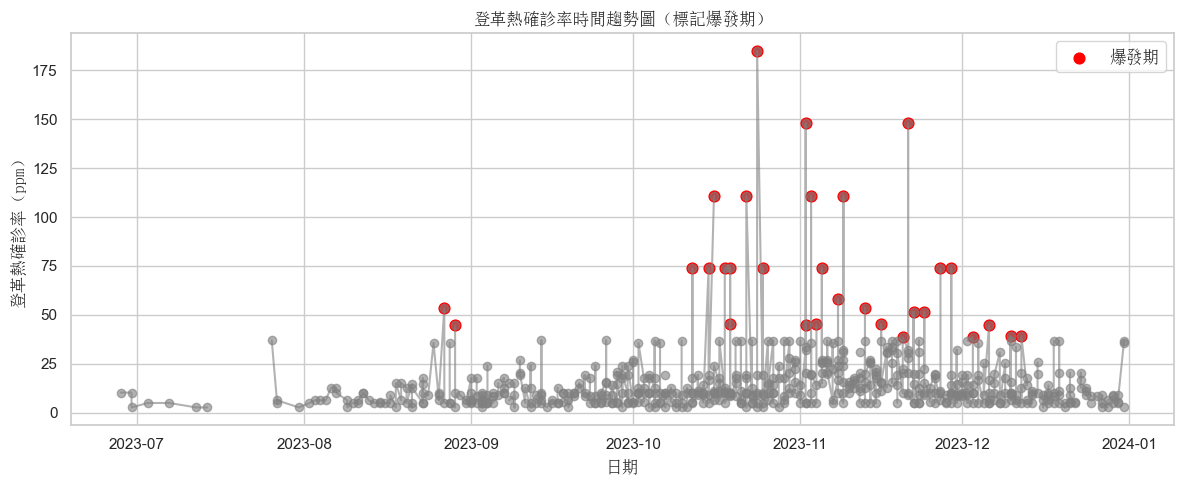

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(merged_df['date'], merged_df['item_percent_ppm'],
         marker='o', linestyle='-', alpha=0.6, color='gray')

# 疫情爆發期強調
outbreak = merged_df[merged_df['outbreak_status'] == '爆發期']
plt.scatter(outbreak['date'], outbreak['item_percent_ppm'],
            color='red', s=60, label='爆發期')

plt.title('登革熱確診率時間趨勢圖（標記爆發期）', fontproperties=winfont01)
plt.xlabel('日期', fontproperties=winfont01)
plt.ylabel('登革熱確診率（ppm）', fontproperties=winfont01)

plt.legend(prop=winfont01)
plt.tight_layout()
plt.show()

In [67]:
import pandas as pd
from scipy.stats import shapiro, kurtosis, skew

# 假設變數是 merged_df['item_percent_ppm']
y = merged_df_select['item_percent_ppm'].dropna()

# 建立敘述性統計資料表
stats = {
    "樣本數 (N)": len(y),
    "平均值": y.mean(),
    "標準差": y.std(),
    "偏態 (Skewness)": skew(y),
    "峰度 (Kurtosis)": kurtosis(y),
    "Shapiro-Wilk 檢定 p 值": shapiro(y)[1]
}

# 轉成 DataFrame
stats_df = pd.DataFrame(stats, index=["登革熱確診率 ppm"]).T.round(4)

# 顯示表格
print(tabulate(stats_df, headers='keys', tablefmt='pretty'))


+------------------------+------------------+
|                        | 登革熱確診率 ppm |
+------------------------+------------------+
|       樣本數 (N)       |      695.0       |
|         平均值         |     15.8019      |
|         標準差         |     17.0174      |
|    偏態 (Skewness)     |      4.4331      |
|    峰度 (Kurtosis)     |      29.239      |
| Shapiro-Wilk 檢定 p 值 |       0.0        |
+------------------------+------------------+


### 畫高雄地圖

C:\Users\USER\AppData\Local\Temp\ipykernel_29252\3973314443.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  kaohsiung["centroid"] = kaohsiung.geometry.centroid
C:\Users\USER\AppData\Local\Temp\ipykernel_29252\3973314443.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  kaohsiung["centroid_lat"] = kaohsiung.centroid.y
C:\Users\USER\AppData\Local\Temp\ipykernel_29252\3973314443.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  kaohsiung["centroid_lon"] = kaohsiung.centroid.x


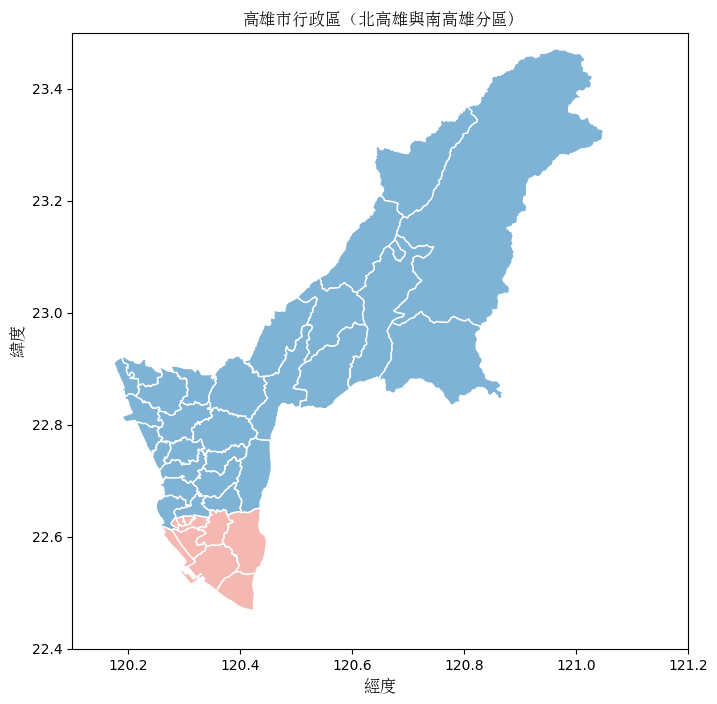

In [96]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 讀取台灣行政區地圖（內含高雄市各區）
# 如果你沒有，可以使用政府開放資料或 gadm.org 的 shapefile
# 假設路徑是 'TOWN_MOI_1120101.shp'
# 高雄火車站座標
station_lat = 22.63966255
station_lon = 120.3027023

tw_map = gpd.read_file("D:/NTPU_class/data_mining/鄉(鎮、市、區)界線1140318/TOWN_MOI_1140318.shp", encoding="utf-8")
kaohsiung = tw_map[tw_map["COUNTYNAME"] == "高雄市"].to_crs(epsg=4326)
kaohsiung = kaohsiung[kaohsiung.is_valid]
kaohsiung["geometry"] = kaohsiung.buffer(0)

# 北高雄與南高雄分區
# 計算重心
kaohsiung["centroid"] = kaohsiung.geometry.centroid
kaohsiung["centroid_lat"] = kaohsiung.centroid.y
kaohsiung["centroid_lon"] = kaohsiung.centroid.x

# ✅ 改這裡：用 lambda 傳入 station_lat
kaohsiung["區域"] = kaohsiung["centroid_lat"].apply(
    lambda lat: "北高雄" if lat > station_lat else "南高雄"
)

# 畫圖
fig, ax = plt.subplots(figsize=(8, 8))
kaohsiung.plot(ax=ax, color="lightgray", edgecolor="white")
kaohsiung[kaohsiung["區域"] == "北高雄"].plot(ax=ax, color="#7fb3d5", edgecolor="white", label="北高雄")
kaohsiung[kaohsiung["區域"] == "南高雄"].plot(ax=ax, color="#f5b7b1", edgecolor="white", label="南高雄")

# 畫圖
# fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal', 'box')
# kaohsiung.plot(ax=ax, color="lightgray", edgecolor="white")
ax.set_xlim(120.1, 121.2)
ax.set_ylim(22.4, 23.5)
plt.title("高雄市行政區（北高雄與南高雄分區)", fontproperties=winfont01)
plt.xlabel("經度", fontproperties=winfont01)
plt.ylabel("緯度", fontproperties=winfont01)
plt.show()

### 區域長條圖

In [102]:
merged_df_select['area'] = merged_df_select['area'].replace({
    1: '北高雄',
    2: '南高雄'
})

C:\Users\USER\AppData\Local\Temp\ipykernel_29252\32482078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_select['area'] = merged_df_select['area'].replace({


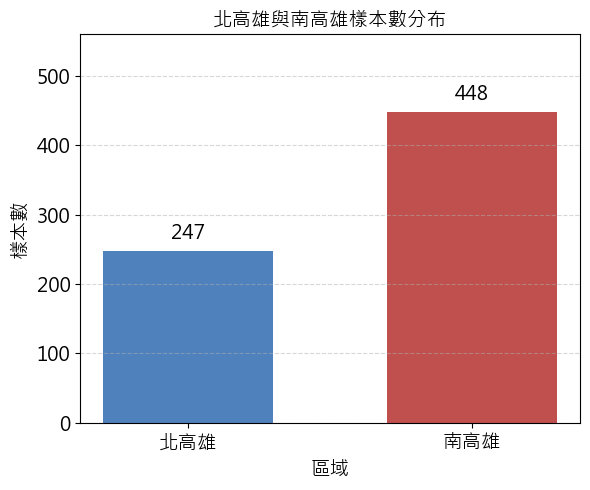

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 中文字體設定
area_counts = merged_df_select['area'].value_counts().reindex(['北高雄', '南高雄'])

plt.figure(figsize=(6, 5))
bars = plt.bar(area_counts.index, area_counts.values,
               color=["#4F81BD", "#C0504D"], width=0.6)

# y 軸留空間避免數字頂到邊界
plt.ylim(0, area_counts.values.max() * 1.25)

# 數字標籤
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 10,
             f"{int(bar.get_height())}",
             ha="center", va="bottom", fontproperties=winfont01)

plt.title("北高雄與南高雄樣本數分布", fontproperties=winfont01)
plt.xticks(fontproperties=winfont01)
plt.yticks(fontproperties=winfont01)
plt.xlabel("區域", fontproperties=winfont01)
plt.ylabel("樣本數", fontproperties=winfont01)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



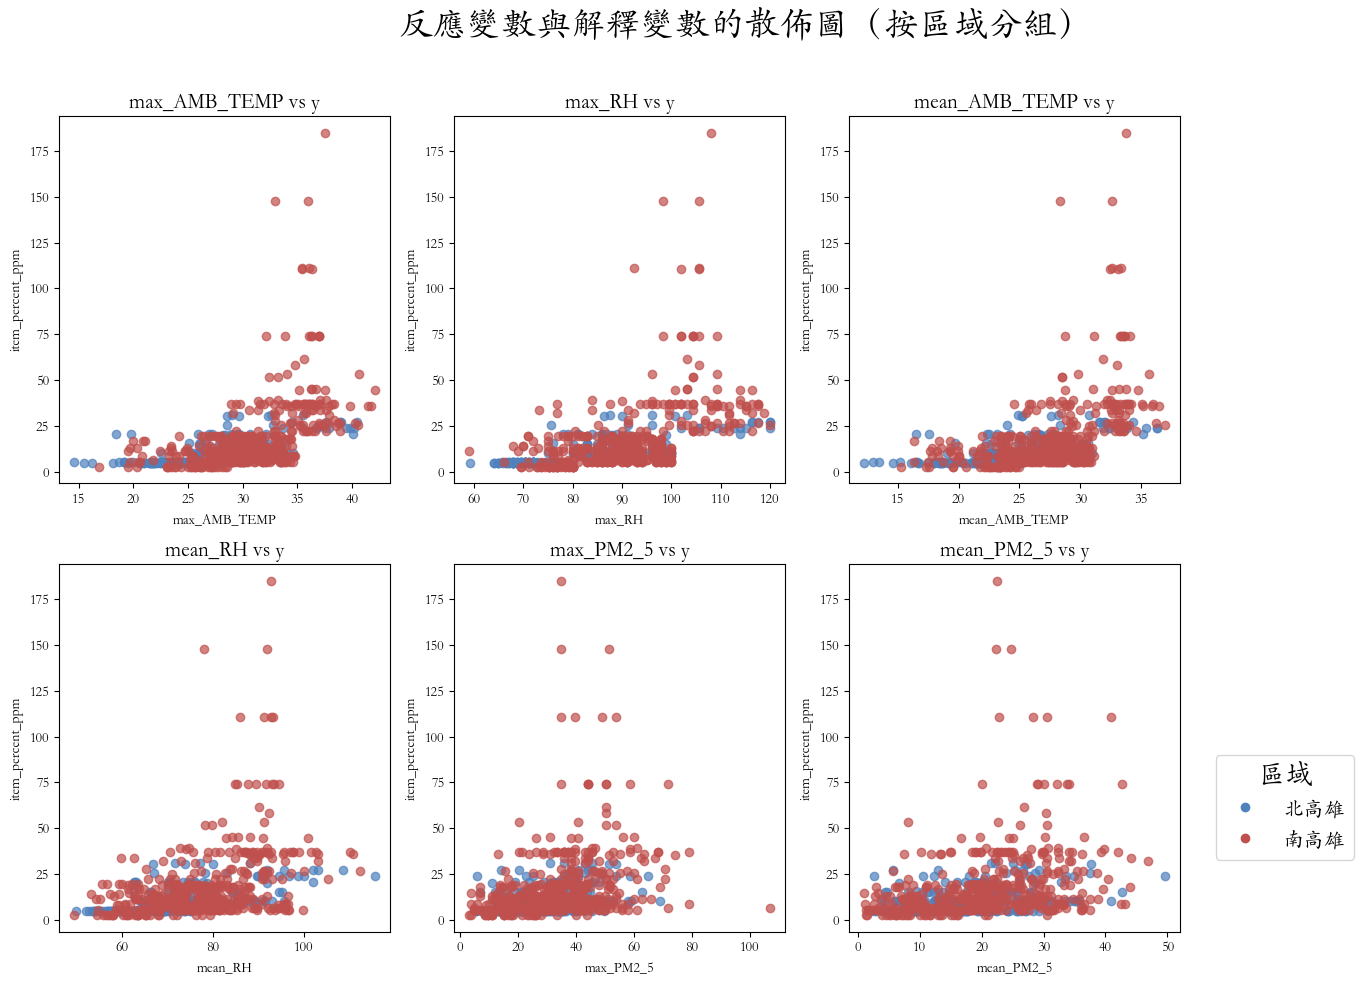

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 手動加載中文字型
font_path = "C:/Windows/Fonts/STKAITI.ttf"  # Windows 系統字型路徑
font = font_manager.FontProperties(fname=font_path)
rc('font', family=font.get_name())

variables = ['max_AMB_TEMP', 'max_RH', 'mean_AMB_TEMP', 'mean_RH', 'max_PM2_5', 'mean_PM2_5']

groups = merged_df_select['area'].unique()  # 分組名稱
colors = ["#4F81BD", "#C0504D"]  # 為每個分組指定顏色

# groups = merged_df_select['season'].unique()  # 分組名稱
# colors = ['r', 'g', 'b']  # 為每個分組指定顏色

# 設置子圖佈局
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

# 繪製每個 x 與 y 的散佈圖
for i, var in enumerate(variables):
    for j, group in enumerate(groups):
        group_data = merged_df_select[merged_df_select['area'] == group]
        axes[i].scatter(group_data[var], group_data['item_percent_ppm'], alpha=0.7, color=colors[j])
    axes[i].set_title(f"{var} vs y", fontproperties=font, fontsize=15)
    axes[i].set_xlabel(var, fontproperties=font, fontsize=10)
    axes[i].set_ylabel("item_percent_ppm", fontproperties=font, fontsize=10)

# 添加全局圖例
handles = [plt.Line2D([], [], marker='o', linestyle='', color=colors[j], label=group) for j, group in enumerate(groups)]
legend = fig.legend(handles, groups, title="區域", loc='lower center', bbox_to_anchor=(0.86, 0.12), ncol=1,
           prop=font_manager.FontProperties(fname=font_path, size=15))  # 使用 bbox_to_anchor 定位到右下角

legend.get_title().set_fontsize(20) 

# 移除多餘的子圖（如果變數數量少於子圖總數）
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# 全局標題與佈局調整
plt.suptitle("反應變數與解釋變數的散佈圖（按區域分組）", fontproperties=font, fontsize=25)
plt.tight_layout(rect=[0, 0, 0.8, 0.96])  # 為右側圖例留出空間
plt.show()

### 以季節看看

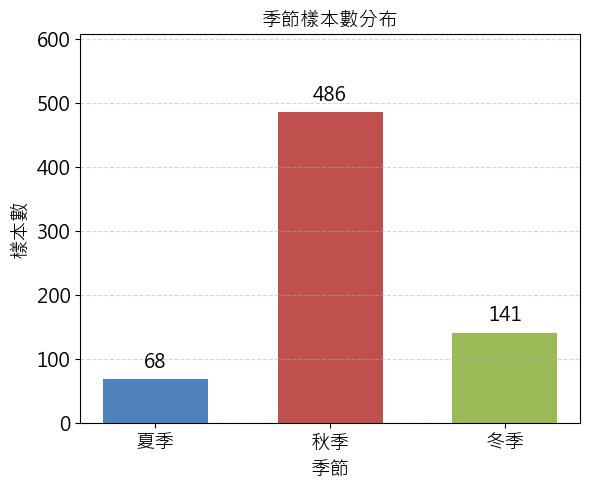

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 中文字體設定
season_counts = merged_df_select['season'].value_counts().reindex(['夏季', '秋季', '冬季'])

plt.figure(figsize=(6, 5))
bars = plt.bar(season_counts.index, season_counts.values,
               color=["#4F81BD", "#C0504D","#9BBB59"], width=0.6)

# y 軸留空間避免數字頂到邊界
plt.ylim(0, season_counts.values.max() * 1.25)

# 數字標籤
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 10,
             f"{int(bar.get_height())}",
             ha="center", va="bottom", fontproperties=winfont01)

plt.title("季節樣本數分布", fontproperties=winfont01)
plt.xticks(fontproperties=winfont01)
plt.yticks(fontproperties=winfont01)
plt.xlabel("季節", fontproperties=winfont01)
plt.ylabel("樣本數", fontproperties=winfont01)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

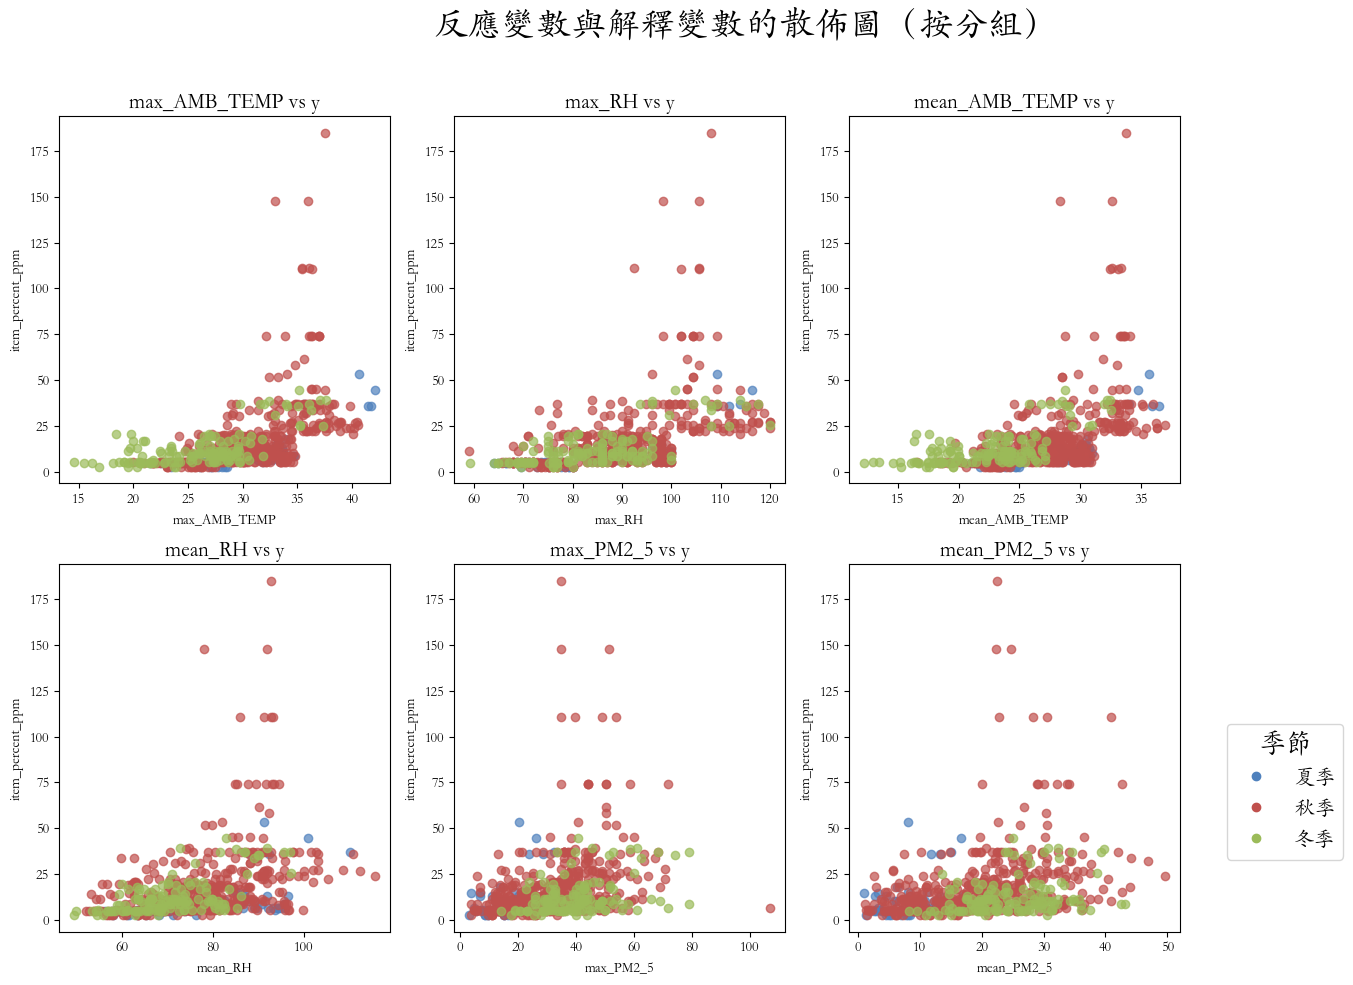

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 手動加載中文字型
font_path = "C:/Windows/Fonts/STKAITI.ttf"  # Windows 系統字型路徑
font = font_manager.FontProperties(fname=font_path)
rc('font', family=font.get_name())

variables = ['max_AMB_TEMP', 'max_RH', 'mean_AMB_TEMP', 'mean_RH', 'max_PM2_5', 'mean_PM2_5']

groups = merged_df_select['season'].unique()  # 分組名稱
colors = ["#4F81BD", "#C0504D","#9BBB59"]  # 為每個分組指定顏色

# groups = merged_df_select['season'].unique()  # 分組名稱
# colors = ['r', 'g', 'b']  # 為每個分組指定顏色

# 設置子圖佈局
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

# 繪製每個 x 與 y 的散佈圖
for i, var in enumerate(variables):
    for j, group in enumerate(groups):
        group_data = merged_df_select[merged_df_select['season'] == group]
        axes[i].scatter(group_data[var], group_data['item_percent_ppm'], alpha=0.7, color=colors[j])
    axes[i].set_title(f"{var} vs y", fontproperties=font, fontsize=15)
    axes[i].set_xlabel(var, fontproperties=font, fontsize=10)
    axes[i].set_ylabel("item_percent_ppm", fontproperties=font, fontsize=10)

# 添加全局圖例
handles = [plt.Line2D([], [], marker='o', linestyle='', color=colors[j], label=group) for j, group in enumerate(groups)]
legend = fig.legend(handles, groups, title="季節", loc='lower center', bbox_to_anchor=(0.86, 0.12), ncol=1,
           prop=font_manager.FontProperties(fname=font_path, size=15))  # 使用 bbox_to_anchor 定位到右下角

legend.get_title().set_fontsize(20) 

# 移除多餘的子圖（如果變數數量少於子圖總數）
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# 全局標題與佈局調整
plt.suptitle("反應變數與解釋變數的散佈圖（按季節分組）", fontproperties=font, fontsize=25)
plt.tight_layout(rect=[0, 0, 0.8, 0.96])  # 為右側圖例留出空間
plt.show()

### 連續變數

各變數 Shapiro-Wilk 檢定結果：
max_AMB_TEMP p = 0.13727  → 接近常態
max_RH       p = 0.00001  → 偏離常態
mean_AMB_TEMP p = 0.00005  → 偏離常態
mean_RH      p = 0.00003  → 偏離常態
max_PM2_5    p = 0.00000  → 偏離常態
mean_PM2_5   p = 0.00002  → 偏離常態


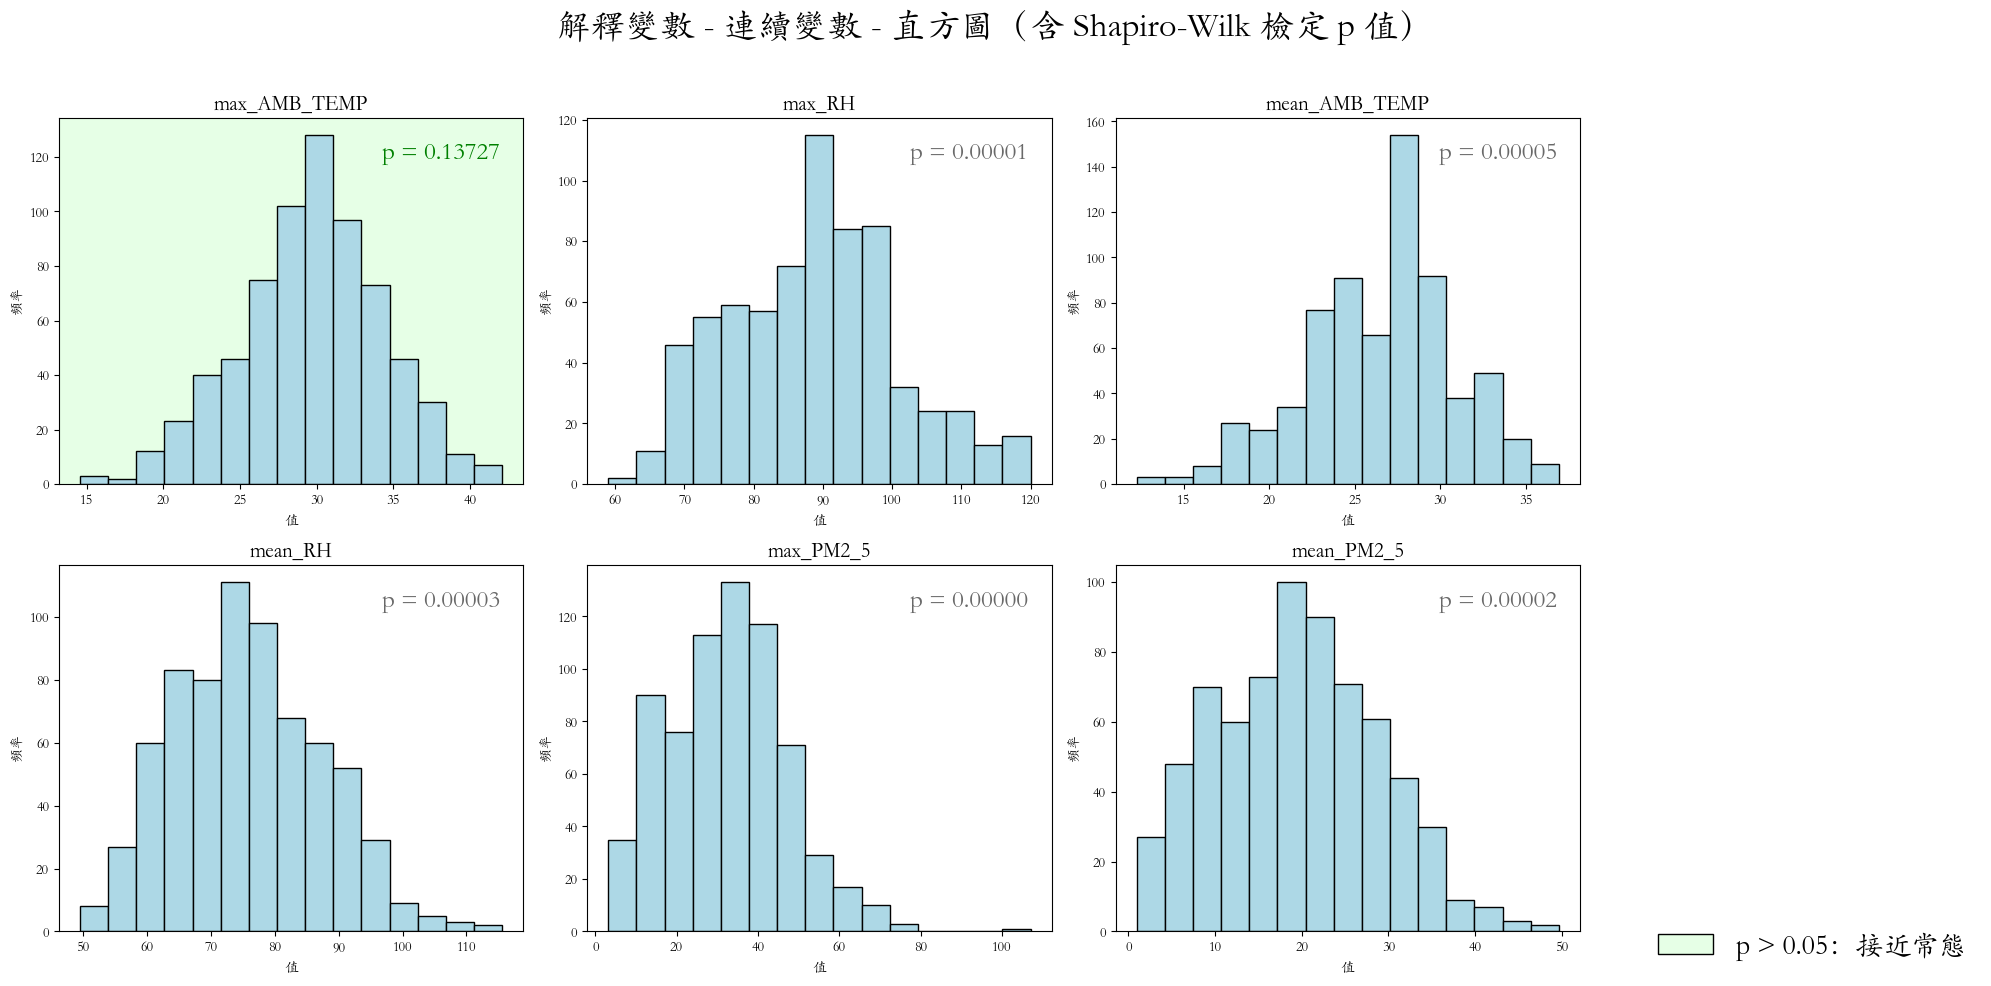

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import font_manager, rc

# 手動加載中文字型
font_path = "C:/Windows/Fonts/STKAITI.ttf"  # Windows 系統字型路徑
font = font_manager.FontProperties(fname=font_path)
rc('font', family=font.get_name())

variables = ['max_AMB_TEMP', 'max_RH', 'mean_AMB_TEMP', 'mean_RH', 'max_PM2_5', 'mean_PM2_5']


# === 自動檢查每個變數的 Shapiro-Wilk p值 ===
p_results = {}
for var in variables:
    clean_data = merged_df_select[var].dropna()  # 移除缺失值
    stat, p_value = shapiro(clean_data)
    p_results[var] = p_value

# 將變數分類
highlight_green_vars = [v for v, p in p_results.items() if p > 0.05]   # 接近常態
highlight_pink_vars = [v for v, p in p_results.items() if p <= 0.05]  # 偏離常態
print("各變數 Shapiro-Wilk 檢定結果：")
for v, p in p_results.items():
    print(f"{v:12s} p = {p:.5f}  → {'接近常態' if p > 0.05 else '偏離常態'}")

# === 畫圖 ===
num_vars = len(variables)
rows, cols = 2, 3  # 設置子圖佈局

fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    axes[i].hist(merged_df_select[var], bins=15, color='lightblue', edgecolor='black')
    axes[i].set_title(var, fontproperties=font, fontsize=15)  # 使用中文字型
    axes[i].set_xlabel("值", fontproperties=font, fontsize=10)
    axes[i].set_ylabel("頻率", fontproperties=font, fontsize=10)
    # if var in highlight_pink_vars:
    #     axes[i].set_facecolor('#ffe4e1')  # 淡粉色背景 (MistyRose)
    # elif var in highlight_green_vars:
    #     axes[i].set_facecolor('#e6ffe6')  # 淡綠色背景 (LightGreen)
    if var in highlight_green_vars:
        axes[i].set_facecolor('#e6ffe6')  # 淡綠色背景 (LightGreen)
    
    # 顯示 p 值
    p_text = f"p = {p_results[var]:.5f}"
    color = 'green' if p_results[var] > 0.05 else 'dimgray'
    axes[i].text(0.95, 0.9, p_text, ha='right', va='center',
                 transform=axes[i].transAxes, fontsize=18,
                 fontproperties=font, color=color)

# 移除多餘的子圖（如果變數數量少於子圖總數）
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

legend_elements = [
    Patch(facecolor='#e6ffe6', edgecolor='black', label='p > 0.05：接近常態'),
    # Patch(facecolor='#ffe4e1', edgecolor='black', label='p ≤ 0.05：偏離常態')
]
fig.legend(handles=legend_elements, loc='lower right', ncol=1, prop=font_manager.FontProperties(fname=font_path, size=20), frameon=False)


plt.suptitle("解釋變數 - 連續變數 - 直方圖（含 Shapiro-Wilk 檢定 p 值）", fontsize=25)
plt.tight_layout(rect=[0, 0, 0.8, 0.96])
plt.show()